In [ ]:
!pip install segmentation_models
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

from matplotlib import pyplot as plt
from patchify import patchify
from PIL import Image
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import random
import numpy as np
from sklearn.model_selection import train_test_split

Segmentation Models: using `keras` framework.


In [ ]:
!mkdir image
!mkdir mask

In [ ]:
scaler = MinMaxScaler()
image_dataset = []
mask_dataset = []
patch_size = 256
imgpath = '/content/image'
maskpath = '/content/mask'

In [ ]:
maskfile = os.listdir(maskpath)
maskfile.sort()
for file in maskfile:
  print(file)

east.png
northcenter.png
northeast.png
northwest.png
south.png
zcenter.png


In [ ]:
imgfile = os.listdir(imgpath)
imgfile.sort()
for file in imgfile:
  if file.endswith('.png'):
    print(file)

east.png
northcenter.png
northeast.png
northwest.png
south.png
zcenter.png


In [ ]:
maskfile = os.listdir(maskpath)
maskfile.sort()
for file in maskfile:
  if file.endswith('.png'):
    mask = cv2.imread(os.path.join(maskpath, file))
    mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
    SIZE_X = (mask.shape[1]//patch_size)*patch_size 
    SIZE_Y = (mask.shape[0]//patch_size)*patch_size 
    mask = Image.fromarray(mask)
    mask = mask.crop((0 ,0, SIZE_X, SIZE_Y))  
    mask = np.array(mask)             

                  
    patches_mask = patchify(mask, (patch_size, patch_size, 3), step=patch_size)  #Step=256 for 256 patches means no overlap
            
    for i in range(patches_mask.shape[0]):
      for j in range(patches_mask.shape[1]):
                            
        single_patch_mask = patches_mask[i,j,:,:]
        single_patch_mask = single_patch_mask[0]                             
        mask_dataset.append(single_patch_mask)

In [ ]:
imgfile = os.listdir(imgpath)
imgfile.sort()
for file in imgfile:
  if file.endswith('.png'):
    print(os.path.join(imgpath, file))
    img = cv2.imread(os.path.join(imgpath, file))
    #cv2_imshow(img)
    SIZE_X = (img.shape[1]//patch_size)*patch_size 
    SIZE_Y = (img.shape[0]//patch_size)*patch_size
    image = Image.fromarray(img)
    image = image.crop((0 ,0, SIZE_X, SIZE_Y))
    image = np.array(image)
    patches_img = patchify(image, (patch_size, patch_size, 3), step=patch_size)
    for i in range(patches_img.shape[0]):
      for j in range(patches_img.shape[1]):        
        single_patch_img = patches_img[i,j,:,:]     
        single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)                    
        image_dataset.append(single_patch_img)

/content/image/east.png
/content/image/northcenter.png
/content/image/northeast.png
/content/image/northwest.png
/content/image/south.png
/content/image/zcenter.png


In [ ]:
print(len(image_dataset), len(mask_dataset))

851 851


734


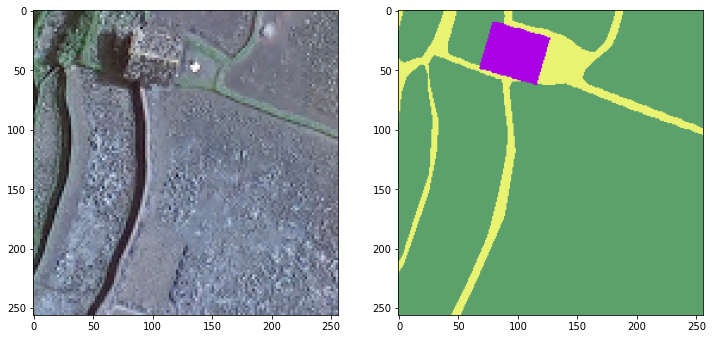

In [ ]:
image_number = random.randint(0, len(image_dataset) - 1)
print(image_number)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (patch_size, patch_size, 3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (patch_size, patch_size, 3)))
plt.show()

In [ ]:
# image_dataset = image_dataset[125:725]
# mask_dataset = mask_dataset[125:725]
dataset,_, mask,_ = train_test_split(image_dataset,mask_dataset, train_size = 0.9, random_state = 42, shuffle = False)
image_dataset = np.array(dataset)
mask_dataset =  np.array(mask)

In [ ]:
settlement = np.array([255, 115, 223])
building = np.array([169, 0, 230])
bush = np.array([245, 176, 159])
river = np.array([0, 197, 255])
#emptyland = np.array([168, 112, 0])
#cemetery = np.array([104, 104, 104])
embankment = np.array([234, 242, 114])
ricefield = np.array([92, 161, 107])
field = np.array([56, 94, 138])
pool = np.array([86, 99, 245])
road = np.array([255, 0, 0])
#irigation = np.array([95, 234, 250])

In [ ]:
label = single_patch_mask
#plt.imshow(label)

In [ ]:
def rgb_to_2D_label(label):

    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == building,axis=-1)] = 0
    label_seg [np.all(label== settlement,axis=-1)] = 1
    label_seg [np.all(label==bush,axis=-1)] = 2
    label_seg [np.all(label==river,axis=-1)] = 3
    #label_seg [np.all(label==emptyland,axis=-1)] = 4
    #label_seg [np.all(label==cemetery,axis=-1)] = 5
    label_seg [np.all(label==embankment,axis=-1)] = 4
    label_seg [np.all(label==ricefield,axis=-1)] = 5
    label_seg [np.all(label==field,axis=-1)] = 6
    label_seg [np.all(label==pool,axis=-1)] = 7
    #label_seg [np.all(label==irigation,axis=-1)] = 
    label_seg [np.all(label==road,axis=-1)] = 8
    label_seg = label_seg[:,:,0]  
    
    return label_seg

In [ ]:
labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_2D_label(mask_dataset[i])
    # print(label)
    labels.append(label)    

labels = np.array(labels)   
labels = np.expand_dims(labels, axis=3)
 

print("Unique labels in label dataset are: ", np.unique(labels))


Unique labels in label dataset are:  [0 1 2 3 4 5 6 7 8]


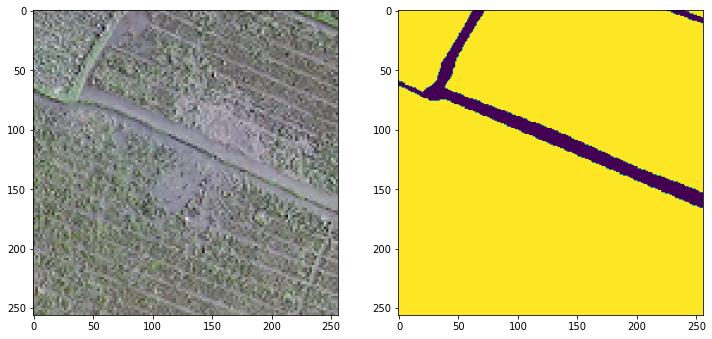

In [ ]:
image_number = random.randint(0, len(image_dataset) - 1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(labels[image_number][:,:,0])
plt.show()

In [ ]:
n_classes = len(np.unique(labels))
from tensorflow.keras.utils import to_categorical
labels_cat = to_categorical(labels, num_classes=n_classes)
X_train, X_test, y_train, y_test = train_test_split(image_dataset, labels_cat, test_size = 0.30, random_state = 42, shuffle = False)
#print(set(y_test))
#print(set(y_train))

In [ ]:
np.unique(y_test)

array([0., 1.], dtype=float32)

In [ ]:
np.unique(y_train)

In [ ]:
y_test

In [ ]:
labels_cat.shape, X_train.shape

((765, 256, 256, 9), (535, 256, 256, 3))

In [ ]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]


In [ ]:
from simple_unet_model_dropout import multi_unet_model, jacard_coef
from tensorflow.keras.optimizers import SGD
metrics=[jacard_coef] #
IMG_HEIGHT = 256
IMG_WIDTH  = 256
IMG_CHANNELS = 3
n_classes = 9
def get_model():
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

model = get_model()
# model.compile(optimizer='adam', loss=total_loss, metrics=metrics)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)
'''
filepath = 'my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.h5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor=’val_loss’,
                             verbose=1, 
                             save_best_only=True,
                             mode=’min’)
#opt = SGD(lr=0.01)
# model.compile(optimizer = opt, loss='categorical_crossentropy', metrics = metrics)
# model.summary()
'''

"\nfilepath = 'my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.h5'\ncheckpoint = ModelCheckpoint(filepath=filepath, \n                             monitor=’val_loss’,\n                             verbose=1, \n                             save_best_only=True,\n                             mode=’min’)\n#opt = SGD(lr=0.01)\n# model.compile(optimizer = opt, loss='categorical_crossentropy', metrics = metrics)\n# model.summary()\n"

In [ ]:
model.fit(X_train, y_train, 
                    batch_size = 30, 
                    verbose=2, 
                    epochs= 30, 
                    validation_data=(X_test, y_test))

Epoch 1/30
18/18 - 365s - loss: 2.1511 - jacard_coef: 0.0677 - val_loss: 1.9630 - val_jacard_coef: 0.0799 - 365s/epoch - 20s/step
Epoch 2/30
18/18 - 363s - loss: 1.9890 - jacard_coef: 0.0869 - val_loss: 1.8011 - val_jacard_coef: 0.1033 - 363s/epoch - 20s/step
Epoch 3/30
18/18 - 363s - loss: 1.8986 - jacard_coef: 0.1019 - val_loss: 1.7286 - val_jacard_coef: 0.1186 - 363s/epoch - 20s/step
Epoch 4/30
18/18 - 364s - loss: 1.8041 - jacard_coef: 0.1202 - val_loss: 1.6545 - val_jacard_coef: 0.1412 - 364s/epoch - 20s/step
Epoch 5/30
18/18 - 363s - loss: 1.7349 - jacard_coef: 0.1348 - val_loss: 1.5950 - val_jacard_coef: 0.1596 - 363s/epoch - 20s/step
Epoch 6/30
18/18 - 362s - loss: 1.6838 - jacard_coef: 0.1476 - val_loss: 1.6252 - val_jacard_coef: 0.1428 - 362s/epoch - 20s/step
Epoch 7/30
18/18 - 369s - loss: 1.6443 - jacard_coef: 0.1538 - val_loss: 1.5649 - val_jacard_coef: 0.1578 - 369s/epoch - 20s/step
Epoch 8/30
18/18 - 363s - loss: 1.6225 - jacard_coef: 0.1604 - val_loss: 1.4651 - val_jaca

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 7.1 MB/s 


In [ ]:
import visualkeras
from collections import defaultdict
from tensorflow.keras import layers

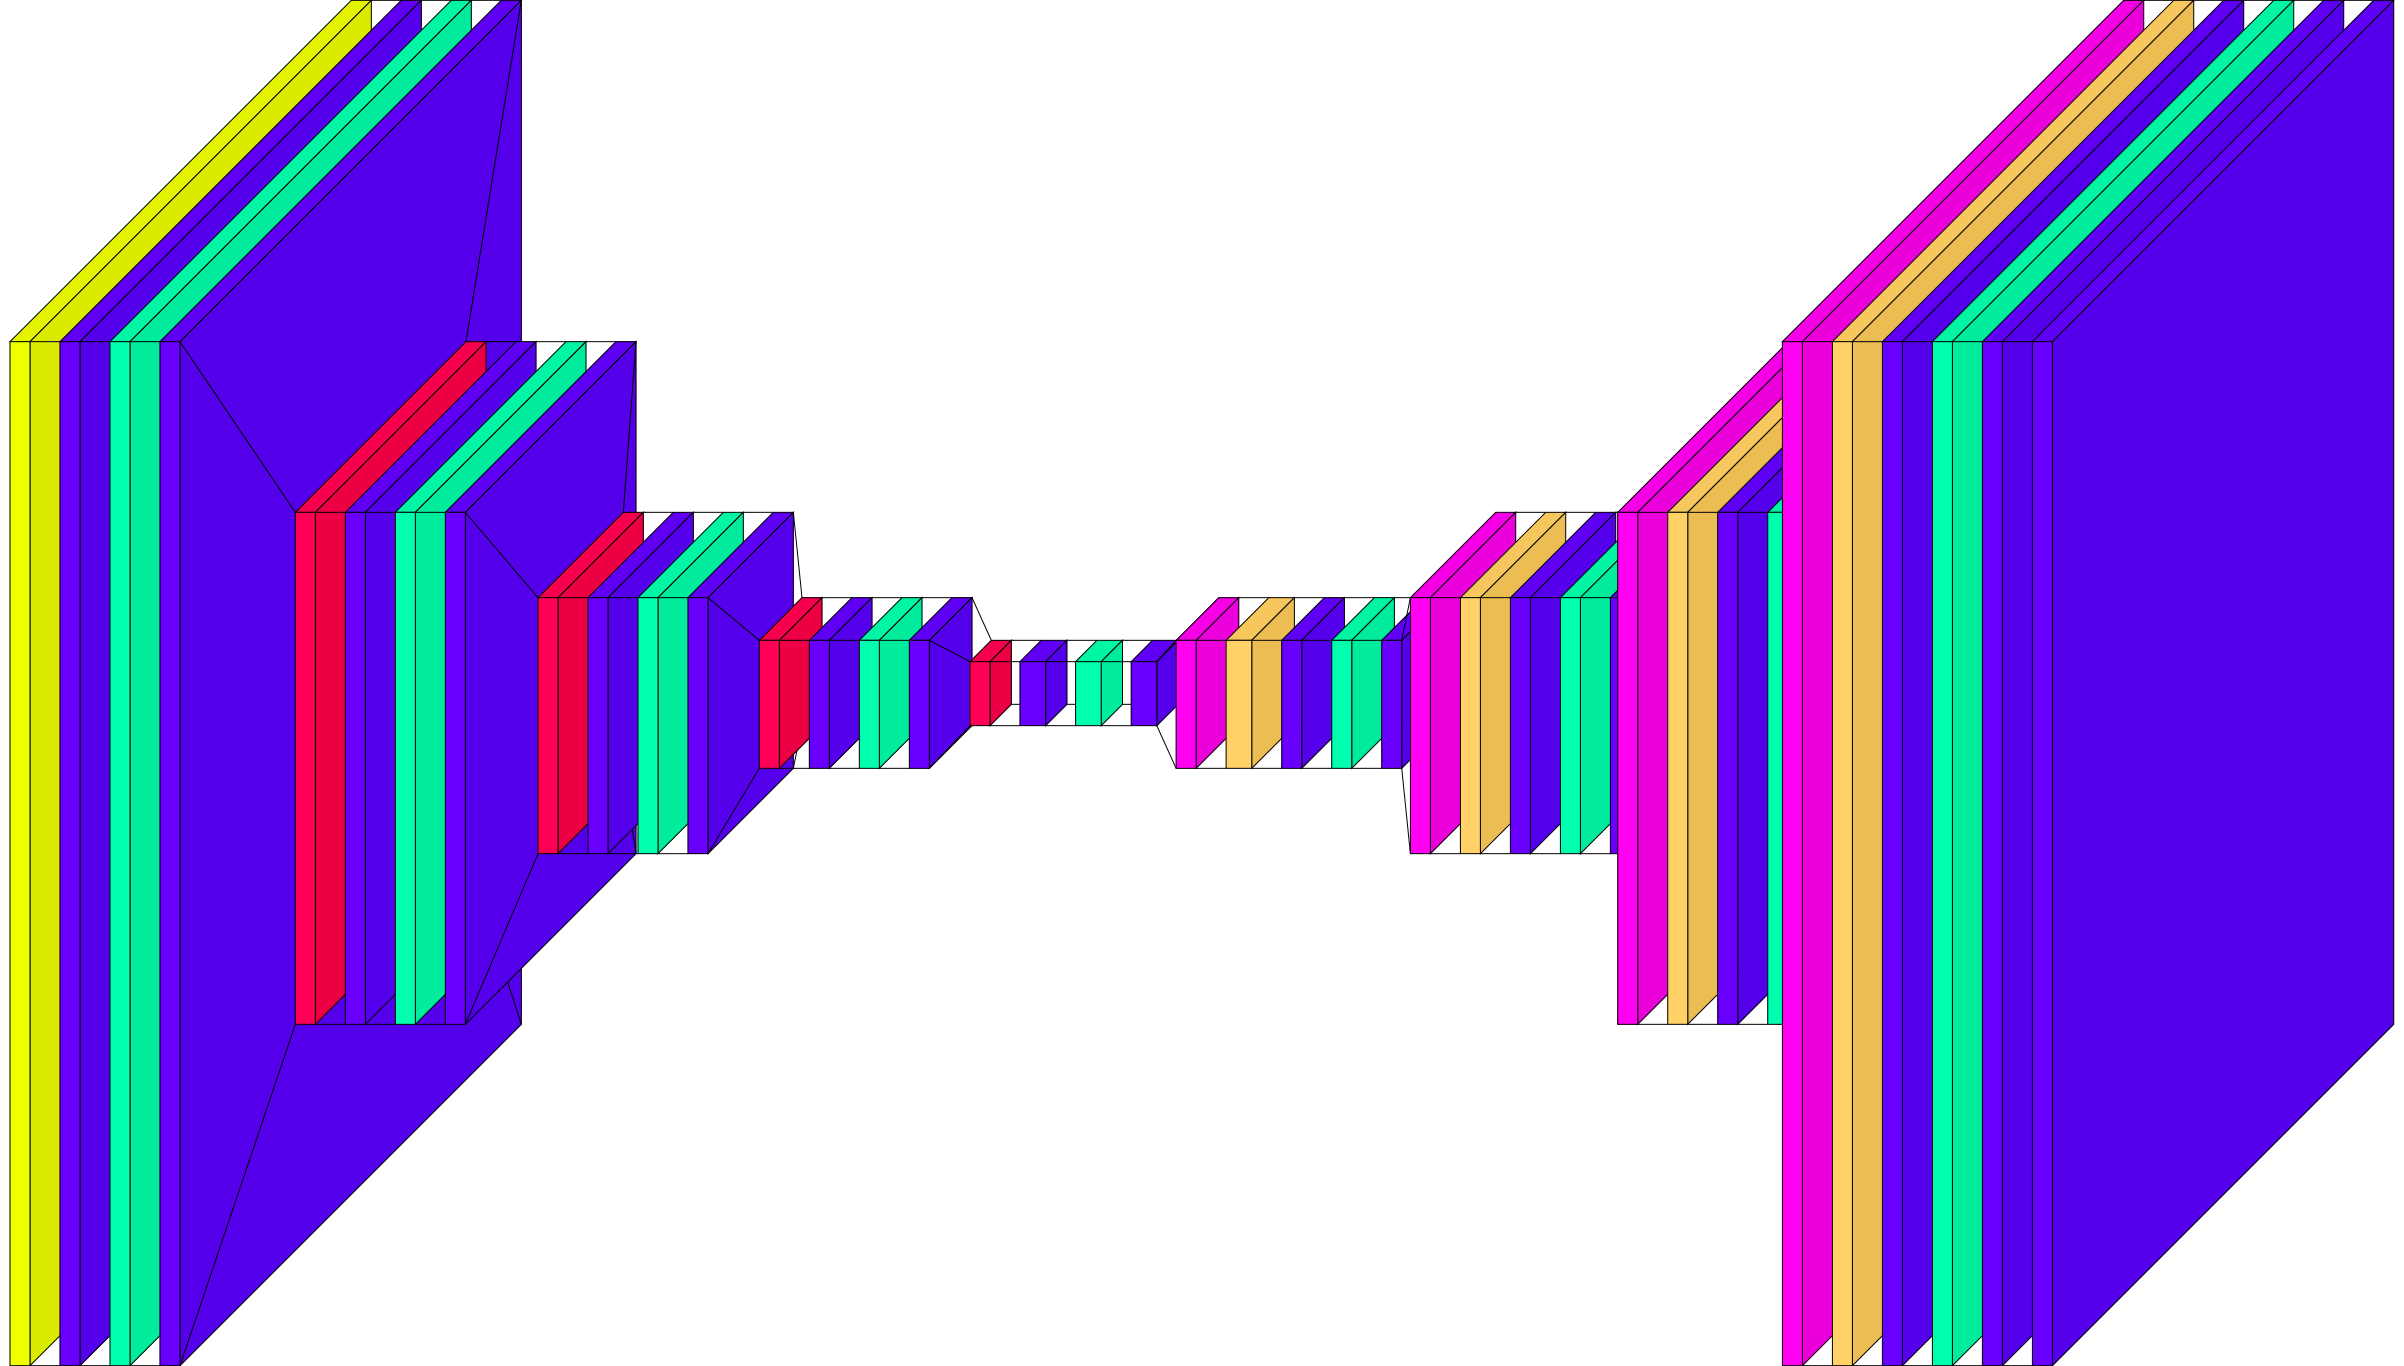

In [ ]:
color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = '#6900ff'
color_map[layers.concatenate]['fill'] = '#ffb300'
color_map[layers.Dropout]['fill'] = '#00ffaf'
color_map[layers.Conv2DTranspose]['fill'] = '#ff00f0'
color_map[layers.MaxPool2D]['fill'] = '#ff0057'
color_map[layers.InputLayer]['fill'] = '#efff00'
visualkeras.layered_view(model, to_file = 'arch2.png', draw_volume= True, color_map = color_map, spacing = 30)
#from PIL import ImageFont
#font = ImageFont.truetype("arial.ttf", 12)
#visualkeras.layered_view(model, legend=True, font=font) # selected font

In [ ]:
model.save('/content/drive/MyDrive/unet_dropout_30epochs08072022.h5')

In [ ]:
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_test_argmax=np.argmax(y_test, axis=3)


from keras.metrics import MeanIoU
n_classes = 9
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test_argmax, y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.27424732


In [ ]:
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test_argmax[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img)
plt.show()